## Precio promedio de propiedades que se encuentran cercanas a escuelas vs propiedades que no

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [15]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [16]:
dfa = df.loc[(~df['precio'].isnull()) & (~df['escuelascercanas'].isnull()) & (~df['tipodepropiedad'].isnull())].copy()
datos = dfa.loc[:,['precio', 'tipodepropiedad','escuelascercanas']].copy()

bool_cols = datos.columns[datos.dtypes == 'bool']
datos[bool_cols] = df[bool_cols].replace({True: 'Si', False: 'No'})
datos.head()

,precio,tipodepropiedad,escuelascercanas
0,2273000,Apartamento,No
1,3600000,Casa en condominio,Si
2,1200000,Casa,No
3,650000,Casa,Si
4,1150000,Apartamento,No


# Escuelas cercanas

In [17]:
#Solamente me interesan las casas y los apartamentos, el resto lo trato como 'Otros'
datos_n = datos.copy()
datos_n['tipodepropiedad'] = datos_n['tipodepropiedad'].map(lambda x: x if x in ['Duplex','Casa', 'Apartamento', 'Casa en condominio'] else 'Otros')
datos_n.head(15)

,precio,tipodepropiedad,escuelascercanas
0,2273000,Apartamento,No
1,3600000,Casa en condominio,Si
2,1200000,Casa,No
3,650000,Casa,Si
4,1150000,Apartamento,No
5,1100000,Apartamento,No
6,1150000,Casa,No
7,4200000,Casa,No
8,310000,Apartamento,Si
9,6200000,Otros,No


In [18]:
datos_n['tipodepropiedad'].value_counts() #OK

Casa                  141717
Apartamento            57341
Otros                  21256
Casa en condominio     19297
Duplex                   343
Name: tipodepropiedad, dtype: int64

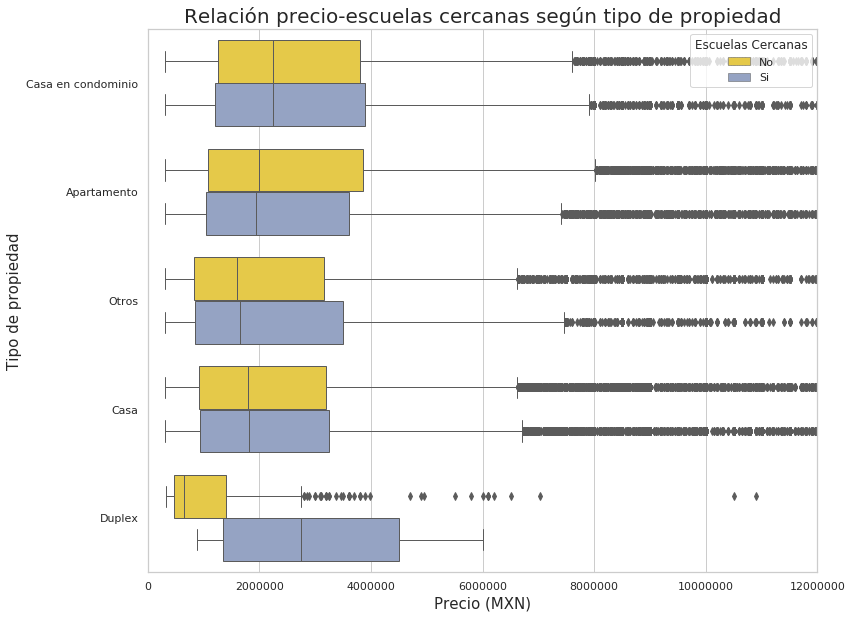

In [19]:
sns.set(style="whitegrid")

ranks = datos_n.groupby("tipodepropiedad")["precio"].mean().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12, 10))
plt.ticklabel_format(style='plain', axis='x') #fix de visualización del eje y

grafico = sns.boxplot(order = ranks, fliersize= 5, hue = "escuelascercanas", x="precio", y="tipodepropiedad", data=datos_n, palette = "Set2_r", linewidth=1)
grafico.set_xlim((0,12000000))
plt.legend(title='Escuelas Cercanas', loc='upper right')
grafico.set_title("Relación precio-escuelas cercanas según tipo de propiedad", fontsize=20)
grafico.set_xlabel("Precio (MXN)",fontsize=15)
grafico.set_ylabel("Tipo de propiedad", fontsize=15)
grafico.figure.savefig("Relación precio-escuelas cercanas según tipo de propiedad.png",bbox_inches='tight')

Se observa una significativa diferencia de precio en el 'tipodepropiedad' duplex.

# Precio promedio general entre todas las propiedades

In [20]:
datos_c = datos_n.loc[:,['precio','escuelascercanas']].copy()
datos_c.head()

,precio,escuelascercanas
0,2273000,No
1,3600000,Si
2,1200000,No
3,650000,Si
4,1150000,No


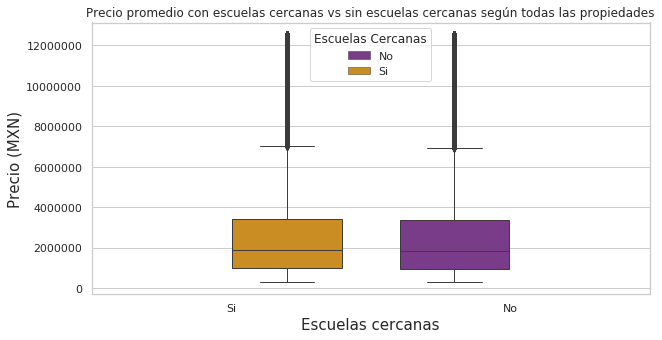

In [21]:
sns.set(style="whitegrid")

ranks = datos_c.groupby("escuelascercanas")["precio"].mean().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='y') #fix de visualización del eje y

grafico = sns.boxplot(order = ranks, hue = "escuelascercanas", x="escuelascercanas", y="precio", data=datos_c, palette = "CMRmap", linewidth=1)
plt.legend(title='Escuelas Cercanas', loc='upper center')
grafico.set_title("Precio promedio con escuelas cercanas vs sin escuelas cercanas según todas las propiedades", fontsize=12)
grafico.set_xlabel("Escuelas cercanas",fontsize=15)
grafico.set_ylabel("Precio (MXN)", fontsize=15)
grafico.figure.savefig("Relación precio-escuelas cercanas.png",bbox_inches='tight')

No se observa una diferencia abismal. 